# Stainlib: Usage example of augmenting images with stain perturbations

In [2]:
import stainlib
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from stainlib.utils.plot_utils import _plot_imagegrid
from stainlib.augmentation.augmenter import StainAugmentor
from stainlib.augmentation.augmenter import GrayscaleAugmentor
from stainlib.augmentation.augmenter import HedLighterColorAugmenter

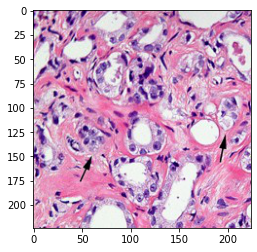

In [3]:
url_image = 'https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fmodpathol.2017.133/MediaObjects/41379_2018_Article_BFmodpathol2017133_Fig6_HTML.jpg'
response = requests.get(url_image)
patch = np.array(Image.open(BytesIO(response.content)))[0:224,0:224,0:3]
plt.imshow(patch)

## Example of augmenting images using the grayscale intensity

In [3]:
grayscale_aug = GrayscaleAugmentor()
grayscale_aug.fit(patch)

/Users/sebastianotalora/work/deliverable3_3_color/stainlib/utils/plot_utils.py:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])
/Users/sebastianotalora/work/deliverable3_3_color/stainlib/utils/plot_utils.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


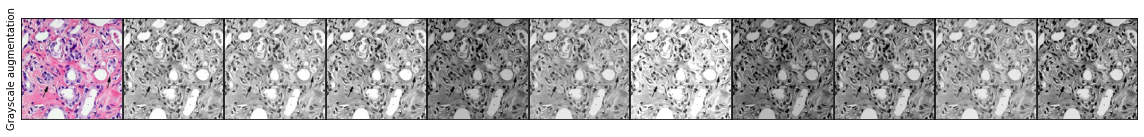

In [4]:
patches = []
titles = []
n_examples = 10
titles.append('Grayscale augmentation')
patches.append(patch)
for i in range(n_examples):
    #hed_lighter_aug.randomize()
    patches.append(grayscale_aug.pop())
    titles.append(None)
_plot_imagegrid(patches, (1,n_examples+1),figsize=(20,10), ylabels=titles)

## Example of augmenting images using the Hematoxylin and Eosin intensity  

In [5]:
patches = []
titles = []
n_examples = 10
hed_lighter_aug = HedLighterColorAugmenter()
patches.append(patch)
titles.append('Light HED augmentation')
for i in range(n_examples):
    hed_lighter_aug.randomize()
    patches.append(hed_lighter_aug.transform(patch))
    titles.append(None)


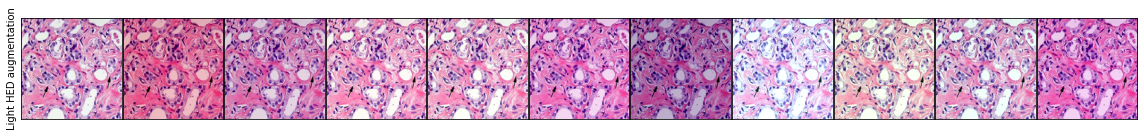

In [6]:
_plot_imagegrid(patches, (1,n_examples+1),figsize=(20,10), ylabels=titles)

## Augmenting patches using the Macenko extractor 

In [7]:
#Extraction of the concentration matrices
macenko_augmentor = StainAugmentor(method='macenko')
macenko_augmentor.fit(patch)

In [8]:
#Obtaining 100 stain-augmented patches
augmented_images = []
for _ in range(100):
    augmented_image = macenko_augmentor.pop()
    augmented_images.append(augmented_image)

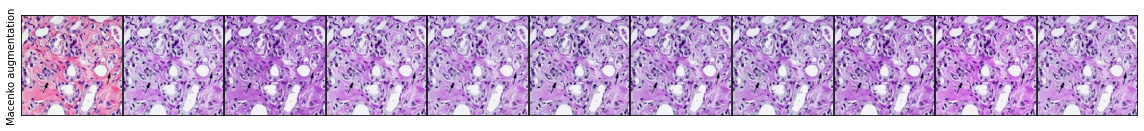

In [9]:
patches = []
titles = []
n_examples = 10
patches.append(patch)
titles.append('Macenko augmentation')
for i in range(n_examples):
    patches.append(macenko_augmentor.pop())
    titles.append(None)
_plot_imagegrid(patches, (1,n_examples+1),figsize=(20,10), ylabels=titles)

## Augmenting patches using the Vahadane extractor

In [4]:
vahadane_augmentor = StainAugmentor(method='vahadane')
vahadane_augmentor.fit(patch)
vahadane_augmentor.pop()

array([[[ 62,  39,  81],
        [130,  67, 144],
        [134,  55, 146],
        ...,
        [104,  44, 118],
        [160,  98, 171],
        [158, 102, 170]],

       [[ 96,  52, 113],
        [152,  83, 163],
        [175, 101, 183],
        ...,
        [143,  79, 156],
        [157,  99, 169],
        [146,  99, 160]],

       [[ 89,  31, 104],
        [123,  59, 137],
        [173, 118, 183],
        ...,
        [168, 103, 178],
        [165, 108, 176],
        [139,  89, 153]],

       ...,

       [[176, 137, 187],
        [182, 140, 192],
        [188, 140, 196],
        ...,
        [111,  63, 127],
        [136,  97, 152],
        [225, 196, 229]],

       [[174, 135, 186],
        [175, 130, 185],
        [170, 122, 181],
        ...,
        [113,  69, 130],
        [142, 107, 157],
        [176, 146, 188]],

       [[221, 187, 225],
        [186, 141, 195],
        [170, 122, 181],
        ...,
        [232, 189, 234],
        [244, 220, 244],
        [229, 215, 233]]

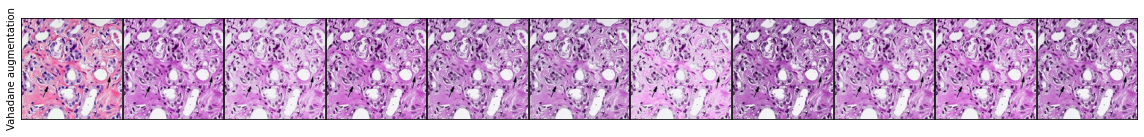

In [13]:
patches = []
titles = []
n_examples = 10
patches.append(patch)
titles.append('Vahadane augmentation')
for i in range(n_examples):
    patches.append(vahadane_augmentor.pop())
    titles.append(None)
_plot_imagegrid(patches, (1,n_examples+1),figsize=(20,10), ylabels=titles)